In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="qwen-qwq-32b")

In [4]:
response = llm.invoke("hi")
response.content

'\n<think>\nOkay, the user just said "hi". I should respond in a friendly and open way. Let me start with a greeting back. Maybe "Hello! How can I assist you today?" That\'s simple and lets them know I\'m here to help. I should keep it welcoming and not too pushy. Yeah, that should work.\n</think>\n\nHello! How can I assist you today? 😊'

In [13]:
from langgraph.graph import StateGraph, END, MessagesState
import asyncio

async def chatbot(state: MessagesState):
    """A funtion to invoke llm model"""
    response = await llm.ainvoke(state["messages"])
    return {"messages": [response]}

In [14]:
builder = StateGraph(MessagesState)

builder.add_node("chatbot", chatbot)

builder.set_entry_point("chatbot")
builder.add_edge("chatbot", END)

graph = builder.compile()

In [15]:
response = await graph.ainvoke(
    {
        "messages":[{
            "role":"user",
            "content": "What is a black hole"
        }]
    }
)

In [16]:
response["messages"][-1].content

'\n<think>\nOkay, the user is asking "What is a black hole?" I need to explain this in a clear and understandable way. Let me start by recalling what I know about black holes.\n\nFirst, I should define a black hole. It\'s a region in space where gravity is so strong that nothing, not even light, can escape. But how does that happen? I think it\'s related to the collapse of a massive star. When a massive star runs out of fuel, it can\'t support itself against its own gravity, leading to a supernova and the core collapsing into a singularity. That\'s the point of infinite density. \n\nWait, maybe I should mention the event horizon too. The event horizon is the boundary around the black hole beyond which nothing can escape. That\'s the "point of no return." So the event horizon\'s radius is called the Schwarzschild radius. I should explain that in simple terms, maybe using a metaphor like a one-way membrane.\n\nAlso, types of black holes: stellar-mass, supermassive, and maybe intermediate

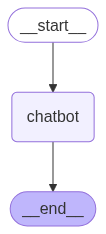

In [17]:
from IPython.display import display, Image

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)